In [6]:
import boto3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Load AWS keys from disk
with open('../../../aws-creds/s3-access-keys.txt', "r") as f:
    ACCESS_KEY, SECRET_KEY = f.readline().strip().split()

In [8]:
# Connect to S3
s3 = boto3.resource("s3", aws_access_key_id=ACCESS_KEY, aws_secret_access_key=SECRET_KEY)
bucket = s3.Bucket(name="zep-tda")

In [16]:
# Specify dates
dates = ["2020-06-16", "2020-06-23"]

In [17]:
# Load csv-files
df = pd.DataFrame()

for d in dates:
    prefix = f"experiments/rc-car/recordings/data/{d}/"
    for obj in bucket.objects.filter(Prefix=prefix):
        response = obj.get()
        chunk = pd.read_csv(response['Body'], index_col=0)

        df = df.append(chunk)

In [18]:
df.tail()

,dist_0,ABS_RX,ABS_Y
2020-06-23_14-13-39-332622,2226.77,-1.0,0.7
2020-06-23_14-13-40-550739,313.81,0.8,0.7
2020-06-23_14-13-41-652937,252.30,0.0,0.7
2020-06-23_14-13-42-745208,119.24,0.0,0.7
2020-06-23_14-13-43-836636,320.55,0.0,0.9


In [19]:
df.shape

(2656, 3)

In [20]:
name = "/data01/nsturma/autopilot/data.csv"
df.to_csv(name)

In [21]:
df["ABS_RX"].value_counts()

 0.0    610
-1.0    468
-0.8    148
-0.9    146
-0.6    142
-0.7    139
-0.4    105
 0.1     99
-0.5     98
 0.3     88
-0.2     87
-0.3     84
-0.1     82
 0.2     69
 0.5     66
 0.4     63
 1.0     45
 0.6     44
 0.7     35
 0.9     21
 0.8     17
Name: ABS_RX, dtype: int64

In [22]:
df["ABS_Y"].value_counts()

 0.6    1431
 0.5     579
 0.7     387
 0.4      72
 0.8      57
 0.9      50
 0.0      28
 0.3      20
 1.0      18
 0.2       9
 0.1       3
-0.4       1
-0.1       1
Name: ABS_Y, dtype: int64

In [25]:
#Load images
from PIL import Image
destination = "/data01/nsturma/autopilot/"
images = []

for d in dates:
    prefix = f"experiments/rc-car/recordings/images/{d}"


   
    for i, obj in enumerate(bucket.objects.filter(Prefix=prefix)):

        # Print progress
        if i%100 == 0:
            print(i)

        # Download to folder
        bucket.download_file(obj.key, destination+obj.key.split("/")[-1])

        # Download to numpy array
        response = obj.get()
        img = Image.open(response["Body"])
        img = np.array(img)
        images.append(img)

images = np.asarray(images)
print(images.shape)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
0
100
200
300
(2656, 224, 224, 3)


In [26]:
# storage in mb
images.nbytes /(1024*1024)

381.28125

### Plot picture

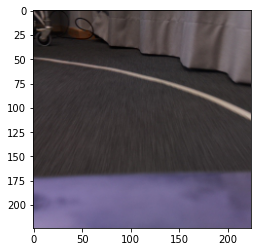

In [27]:
img = images[1853]
plt.imshow(img)

### check data

In [28]:
# left, straight, right
tstamps = ["2020-06-16_09-09-17-717871", "2020-06-16_09-04-01-009389", "2020-06-16_16-05-04-245544"]

In [29]:
df.loc["2020-06-16_09-09-17-717871"]

dist_0    120.45
ABS_RX     -1.00
ABS_Y       0.60
Name: 2020-06-16_09-09-17-717871, dtype: float64

ABS_RX   -1.0
ABS_Y     0.6
Name: 2020-06-16_09-09-17-717871, dtype: float64


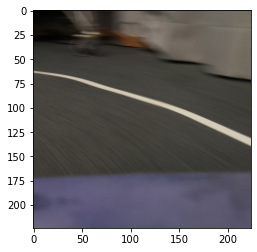

ABS_RX    0.0
ABS_Y     0.5
Name: 2020-06-16_09-04-01-009389, dtype: float64


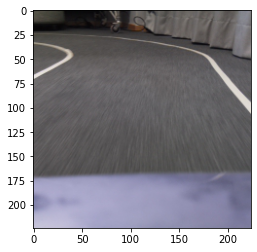

ABS_RX    1.0
ABS_Y     0.7
Name: 2020-06-16_16-05-04-245544, dtype: float64


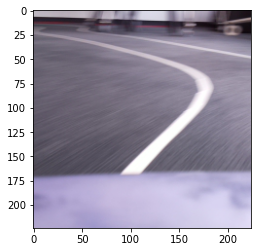

In [33]:
from tensorflow.keras.preprocessing import image

for t in tstamps:
    print(df.loc[t,["ABS_RX", "ABS_Y"]])
    img_path = f"/data01/nsturma/autopilot/{t}.jpg"
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.show()

### Cut images

In [34]:
# cut them
im_small = images[:,:170,:,:]
im_small.shape

(2656, 170, 224, 3)

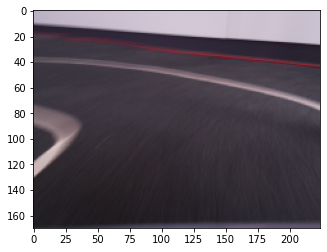

In [37]:
img = im_small[-1]
plt.imshow(img)

In [36]:
# Normalize the images to [-0.5, 0.5]
#images = (images / 255) 